In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re

In [2]:
school_support = pd.read_csv("C:\\Users\Omkaar Sampigeadi\Downloads\DataNova Datasets\\2021-22-crdc-data\SCH\School Support.csv")
enrollment = pd.read_csv("C:\\Users\Omkaar Sampigeadi\Downloads\DataNova Datasets\\2021-22-crdc-data\SCH\Enrollment.csv")
corporal_punishment = pd.read_csv("C:\\Users\Omkaar Sampigeadi\Downloads\DataNova Datasets\\2021-22-crdc-data\SCH\Corporal Punishment.csv")
expulsions = pd.read_csv("C:\\Users\Omkaar Sampigeadi\Downloads\DataNova Datasets\\2021-22-crdc-data\SCH\Expulsions.csv")

C:\Users\Omkaar Sampigeadi\AppData\Local\Temp\ipykernel_30340\1544074868.py:1: DtypeWarning: Columns (2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  school_support = pd.read_csv("C:\\Users\Omkaar Sampigeadi\Downloads\DataNova Datasets\\2021-22-crdc-data\SCH\School Support.csv")
C:\Users\Omkaar Sampigeadi\AppData\Local\Temp\ipykernel_30340\1544074868.py:2: DtypeWarning: Columns (2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  enrollment = pd.read_csv("C:\\Users\Omkaar Sampigeadi\Downloads\DataNova Datasets\\2021-22-crdc-data\SCH\Enrollment.csv")
C:\Users\Omkaar Sampigeadi\AppData\Local\Temp\ipykernel_30340\1544074868.py:3: DtypeWarning: Columns (2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  corporal_punishment = pd.read_csv("C:\\Users\Omkaar Sampigeadi\Downloads\DataNova Datasets\\2021-22-crdc-data\SCH\Corporal Punishment.csv")
C:\Users\Omkaar Sampigeadi\AppData\Local\Temp\ipykernel_303

In [3]:
# Descriptive statistics for key metrics
def analyze_descriptive_stats(df, metric_columns, table_heading):
    """Generate descriptive statistics for specified columns"""
    stats_summary = df[metric_columns].describe()
    print(f"Descriptive Statistics: {table_heading}")
    print(stats_summary)
    print()


# Example for school support data
support_metrics = ['SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT', 'SCH_FTETEACH_NOTCERT']
if all(col in school_support.columns for col in support_metrics):
   analyze_descriptive_stats(school_support, support_metrics, "School Support Metrics")


# Example for enrollment data - focusing on disability-related columns
disability_metrics = [
    'SCH_ENR_IDEA_M',     # Male students served under IDEA (Individuals with Disabilities Education Act)
    'SCH_ENR_IDEA_F',     # Female students served under IDEA (Individuals with Disabilities Education Act
    'SCH_ENR_504_M',      # Male students with 504 plans (Section 504 of the Rehabilitation Act)
    'SCH_ENR_504_F'       # Female students with 504 plans (Section 504 of the Rehabilitation Act)
]

analyze_descriptive_stats(enrollment, disability_metrics, "Enrollment Metrics for Students with Disabilities")

# Descriptive analysis for corporal punishment dataset
corporal_disability_metrics = [
  key for key in corporal_punishment.keys() if "_DISCWDIS_" in key
]

# Check which columns exist in the dataset
existing_corporal_cols = [col for col in corporal_disability_metrics if col in corporal_punishment.columns]
if existing_corporal_cols:
    analyze_descriptive_stats(corporal_punishment, existing_corporal_cols,
                              "Corporal Punishment for Students with Disabilities")
else:
    print("No corporal punishment disability columns found in dataset")

# Descriptive analysis for expulsions dataset among IDEA students
expulsion_disability_metrics = [
    "SCH_PSDISC_EXP_IDEA_M",  #
    "SCH_PSDISC_EXP_IDEA_F",
]

# Check which columns exist in the dataset
existing_expulsion_cols = [col for col in expulsion_disability_metrics if col in expulsions.columns]

analyze_descriptive_stats(expulsions, existing_expulsion_cols, "Expulsions for Students with Disabilities")
if len(existing_expulsion_cols) == 0:
    print("No expulsion disability columns found in dataset")
# First 5 columns

Descriptive Statistics: School Support Metrics
       SCH_FTETEACH_TOT  SCH_FTETEACH_CERT  SCH_FTETEACH_NOTCERT
count      98010.000000       98010.000000          98010.000000
mean          34.605761          33.161289              1.442351
std           27.210973          26.455871              4.497697
min           -6.000000          -6.000000             -6.000000
25%           18.010000          17.000000              0.000000
50%           29.330000          28.000000              0.000000
75%           43.430000          42.000000              1.000000
max         1074.000000         784.000000            305.000000

Descriptive Statistics: Enrollment Metrics for Students with Disabilities
       SCH_ENR_IDEA_M  SCH_ENR_IDEA_F  SCH_ENR_504_M  SCH_ENR_504_F
count    98010.000000    98010.000000   98010.000000   98010.000000
mean        44.636700       23.561912       7.944904       5.245975
std         44.503713       25.511122      19.941082      16.584246
min         -9.000000

In [20]:

# Function to filter columns using regex patterns
def filter_columns_by_regex(df, pattern, description):
    """Filter dataframe columns using regex pattern"""
    matching_cols = [col for col in df.columns if re.search(pattern, col, re.IGNORECASE)]
    # print(f"{description}: {len(matching_cols)} columns found")
    # if matching_cols:
    #     print(f"Sample columns: {matching_cols[:3]}")
    return matching_cols


# Filter by gender (Male/Female)
print("=== FILTERING BY GENDER ===")
male_disability_cols = filter_columns_by_regex(enrollment, r'(IDEA|504).*_M$', "Male students with disabilities")
female_disability_cols = filter_columns_by_regex(enrollment, r'(IDEA|504).*_F$', "Female students with disabilities")

# Filter by race/ethnicity using regex
print("=== FILTERING BY RACE/ETHNICITY ===")
race_patterns = {
    'Hispanic': r'_HI_[MF]$',
    'American Indian': r'_AM_[MF]$',
    'Asian': r'_AS_[MF]$',
    'Hawaiian/Pacific Islander': r'_HP_[MF]$',
    'Black': r'_BL_[MF]$',
    'White': r'_WH_[MF]$',
    'Two or More Races': r'_TR_[MF]$'
}

# Filter enrollment data by race and disability status
for race, pattern in race_patterns.items():
    disability_race_cols = filter_columns_by_regex(enrollment, f'(IDEA|504).*{pattern}',
                                                   f"{race} students with disabilities")

# Filter disciplinary data by race and disability
print("=== CORPORAL PUNISHMENT BY RACE AND DISABILITY ===")
for race, pattern in race_patterns.items():
    corporal_race_cols = filter_columns_by_regex(corporal_punishment, f'DISCWDIS.*{pattern}',
                                                 f"{race} students - corporal punishment")

print("=== EXPULSIONS BY RACE AND DISABILITY ===")
for race, pattern in race_patterns.items():
    expulsion_race_cols = filter_columns_by_regex(expulsions, f'(PSDISC|DISCWDIS).*{pattern}',
                                                  f"{race} students - expulsions")


# Filter by disability type (IDEA vs 504 plans)
print("=== FILTERING BY DISABILITY TYPE ===")
idea_enrollment = filter_columns_by_regex(enrollment, r'IDEA_[MF]$', "IDEA students")
section504_enrollment = filter_columns_by_regex(enrollment, r'504_[MF]$', "Section 504 students")


# Targeted analysis: Black male students with disabilities
print("=== TARGETED ANALYSIS: BLACK MALE STUDENTS WITH DISABILITIES ===")
black_male_disability = filter_columns_by_regex(enrollment, r'(IDEA|504).*_BL_M$',
                                                "Black male students with disabilities")

# Compare with disciplinary actions
black_male_corporal = filter_columns_by_regex(corporal_punishment, r'DISCWDIS.*_BL_M$',
                                              "Black male students - corporal punishment")
black_male_expulsions = filter_columns_by_regex(expulsions, r'(PSDISC|DISCWDIS).*_BL_M$',
                                                "Black male students - expulsions")


=== FILTERING BY GENDER ===
=== FILTERING BY RACE/ETHNICITY ===
=== CORPORAL PUNISHMENT BY RACE AND DISABILITY ===
=== EXPULSIONS BY RACE AND DISABILITY ===
=== FILTERING BY DISABILITY TYPE ===
=== TARGETED ANALYSIS: BLACK MALE STUDENTS WITH DISABILITIES ===


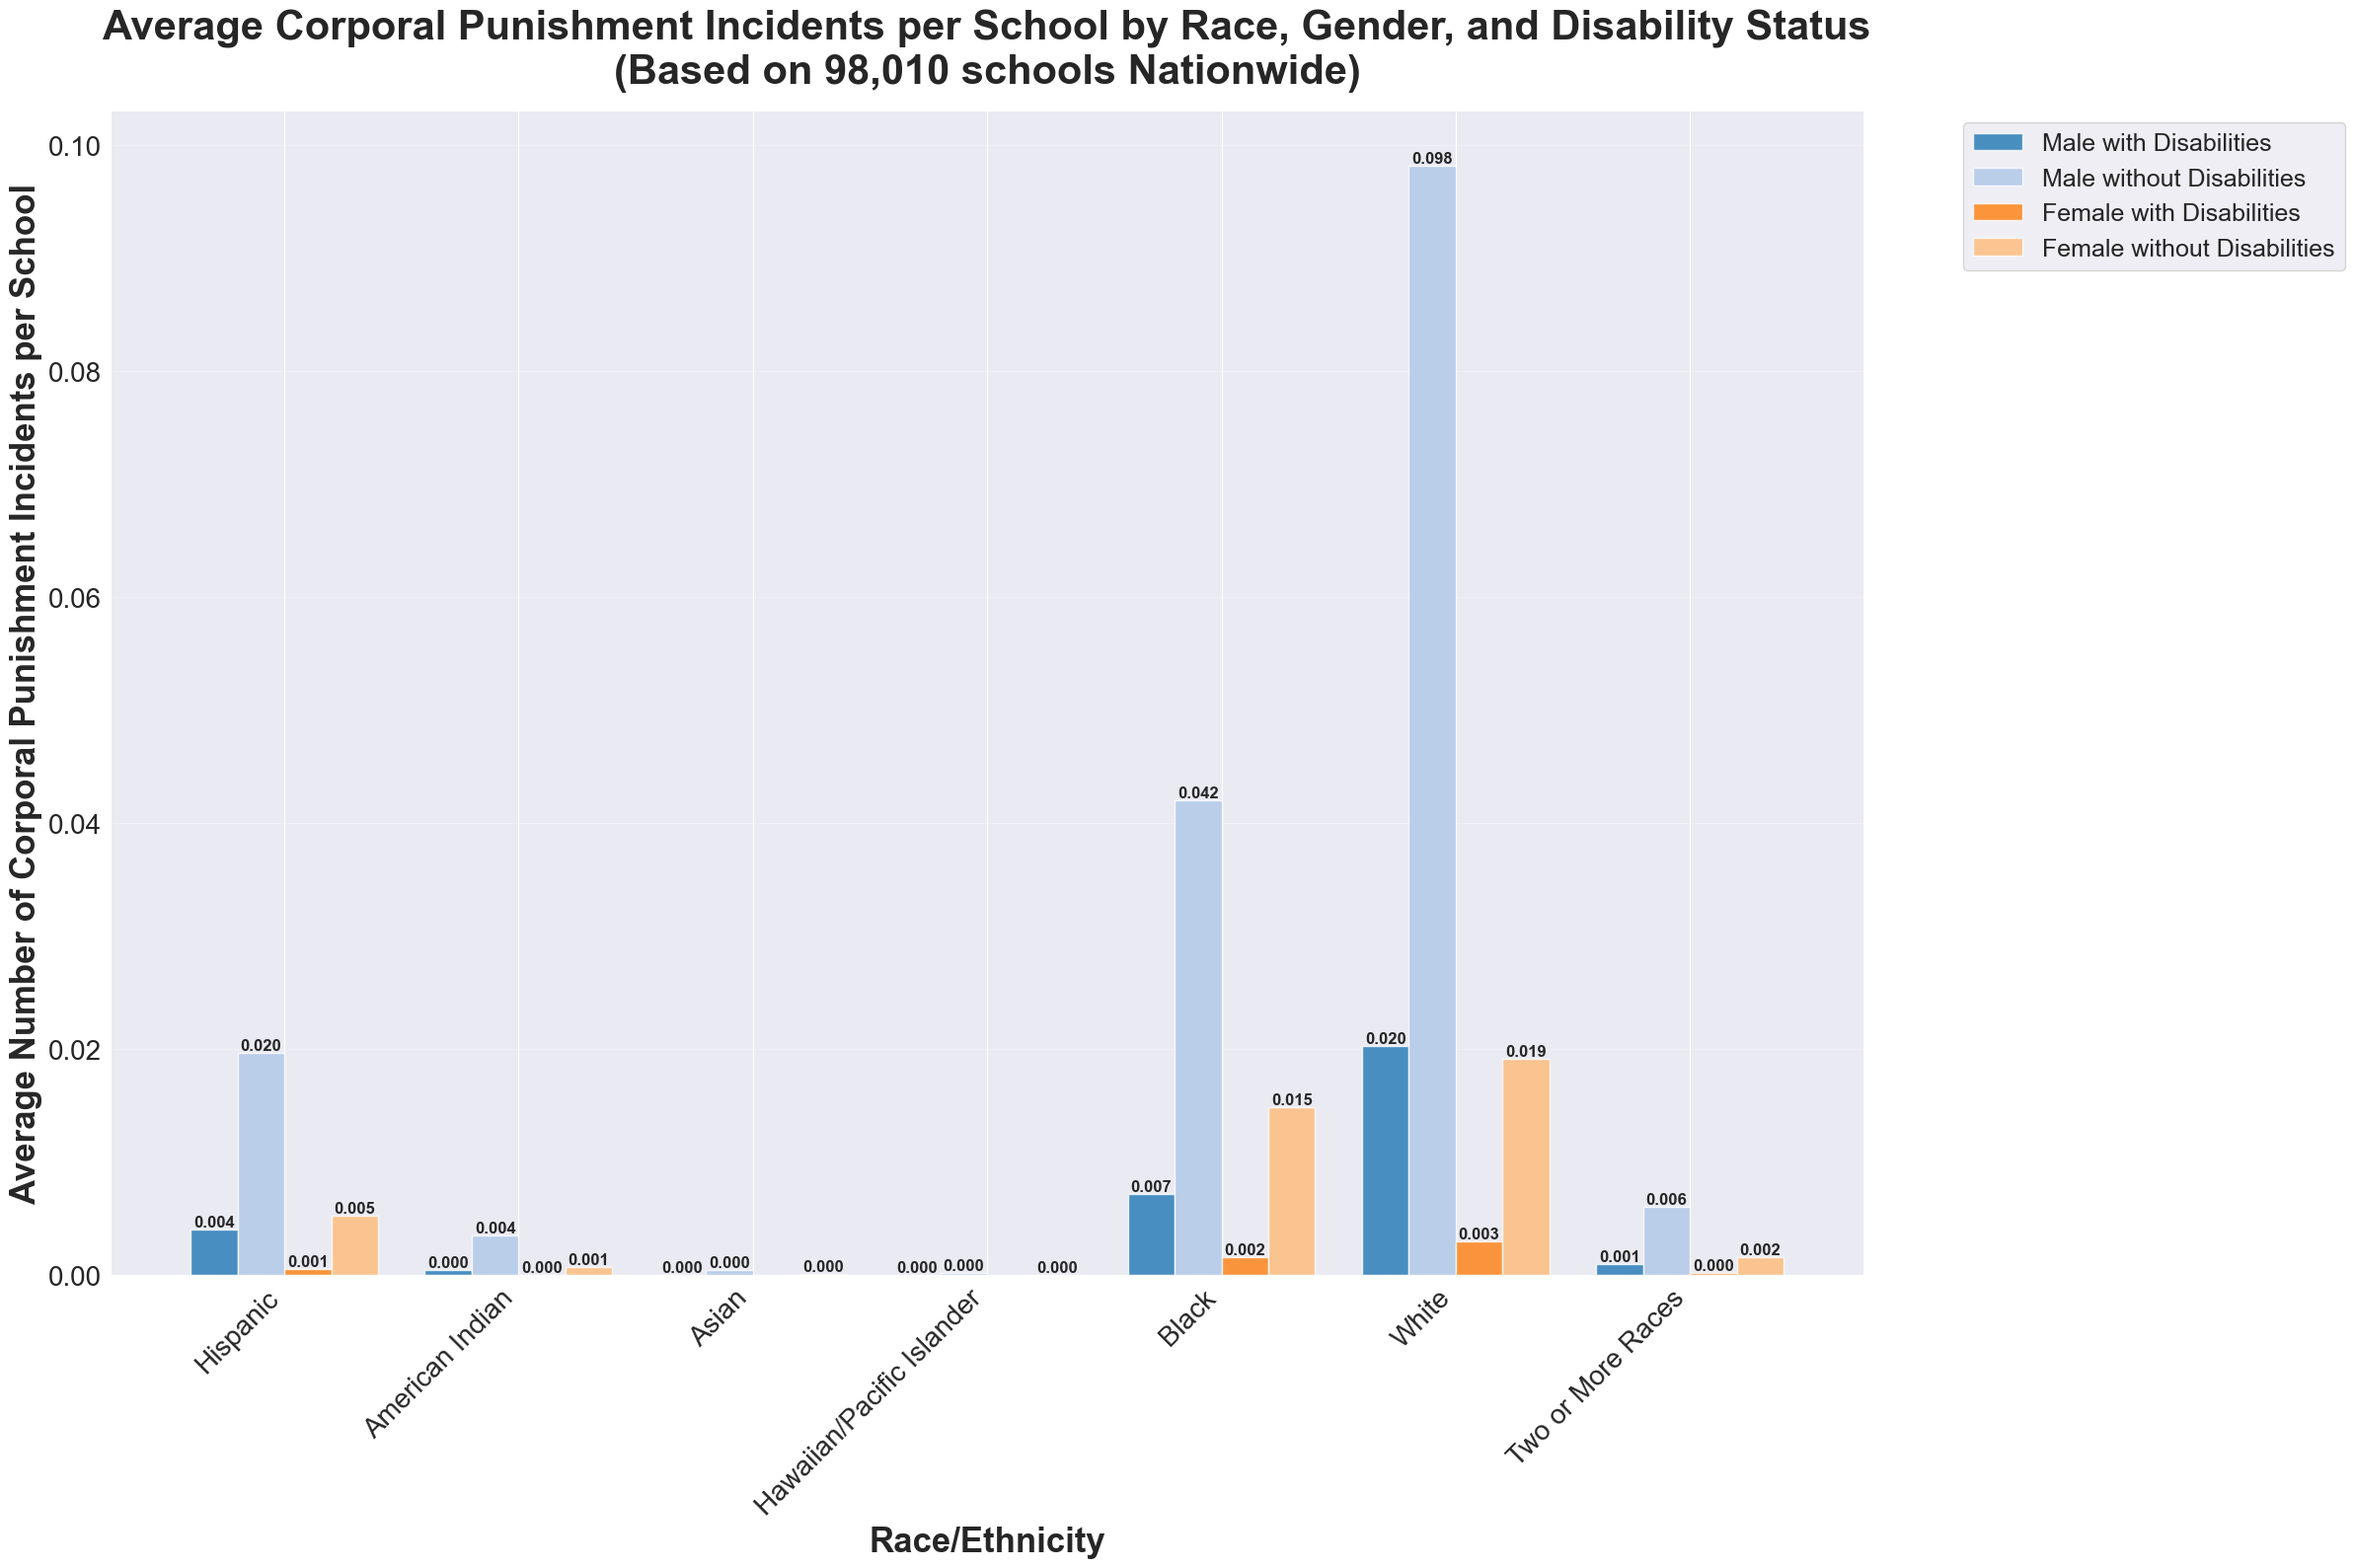

In [22]:
# Create compound bar chart: Race x Gender x Disability Status (Average per School)
fig, ax = plt.subplots(figsize=(24, 16))
# Total number of schools in dataset
total_schools = 98010

# Values to exclude (negative codes from data documentation)
exclude_values = [-3, -4, -5, -6, -8, -9, -11, -13]

# Function to clean data by replacing excluded values with 0
def clean_data(df, columns):
    """Replace excluded values with 0 for specified columns"""
    cleaned_df = df.copy()
    for col in columns:
        if col in cleaned_df.columns:
            cleaned_df[col] = cleaned_df[col].replace(exclude_values, 0)
    return cleaned_df

# Prepare data for the compound bar chart
compound_data = []

for race, pattern in race_patterns.items():
    # Male students with disabilities
    male_disabled_cols = filter_columns_by_regex(corporal_punishment, f'DISCWDIS.*{pattern.replace("[MF]", "M")}', "")
    if male_disabled_cols:
        cleaned_cp = clean_data(corporal_punishment, male_disabled_cols)
        male_disabled_count = cleaned_cp[male_disabled_cols].sum().sum()
    else:
        male_disabled_count = 0

    # Female students with disabilities
    female_disabled_cols = filter_columns_by_regex(corporal_punishment, f'DISCWDIS.*{pattern.replace("[MF]", "F")}', "")
    if female_disabled_cols:
        cleaned_cp = clean_data(corporal_punishment, female_disabled_cols)
        female_disabled_count = cleaned_cp[female_disabled_cols].sum().sum()
    else:
        female_disabled_count = 0

    # Male students without disabilities
    male_non_disabled_cols = filter_columns_by_regex(corporal_punishment, f'DISCWODIS.*{pattern.replace("[MF]", "M")}', "")
    if male_non_disabled_cols:
        cleaned_cp = clean_data(corporal_punishment, male_non_disabled_cols)
        male_non_disabled_count = cleaned_cp[male_non_disabled_cols].sum().sum()
    else:
        male_non_disabled_count = 0

    # Female students without disabilities
    female_non_disabled_cols = filter_columns_by_regex(corporal_punishment, f'DISCWODIS.*{pattern.replace("[MF]", "F")}', "")
    if female_non_disabled_cols:
        cleaned_cp = clean_data(corporal_punishment, female_non_disabled_cols)
        female_non_disabled_count = cleaned_cp[female_non_disabled_cols].sum().sum()
    else:
        female_non_disabled_count = 0

    compound_data.append({
        'Race': race,
        'Male_Disabled': male_disabled_count / total_schools,
        'Female_Disabled': female_disabled_count / total_schools,
        'Male_Non_Disabled': male_non_disabled_count / total_schools,
        'Female_Non_Disabled': female_non_disabled_count / total_schools
    })

compound_df = pd.DataFrame(compound_data)

# Create the compound bar chart
x = np.arange(len(compound_df))
width = 0.2

# Male colors (blue shades)
male_disabled_color = '#1f77b4'      # Dark blue
male_non_disabled_color = '#aec7e8'  # Light blue

# Female colors (red/orange shades)
female_disabled_color = '#ff7f0e'    # Orange
female_non_disabled_color = '#ffbb78' # Light orange

bars1 = ax.bar(x - 1.5*width, compound_df['Male_Disabled'], width,
               label='Male with Disabilities', color=male_disabled_color, alpha=0.8)
bars2 = ax.bar(x - 0.5*width, compound_df['Male_Non_Disabled'], width,
               label='Male without Disabilities', color=male_non_disabled_color, alpha=0.8)
bars3 = ax.bar(x + 0.5*width, compound_df['Female_Disabled'], width,
               label='Female with Disabilities', color=female_disabled_color, alpha=0.8)
bars4 = ax.bar(x + 1.5*width, compound_df['Female_Non_Disabled'], width,
               label='Female without Disabilities', color=female_non_disabled_color, alpha=0.8)

# Customize the chart with larger font sizes
ax.set_xlabel('Race/Ethnicity', fontsize=25, fontweight='bold')
ax.set_ylabel('Average Number of Corporal Punishment Incidents per School', fontsize=25, fontweight='bold')
ax.set_title('Average Corporal Punishment Incidents per School by Race, Gender, and Disability Status\n(Based on 98,010 schools Nationwide)',
             fontsize=30, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(compound_df['Race'], rotation=45, ha='right', fontsize=20)
ax.tick_params(axis='y', labelsize=20)

# Larger legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18)

# Add grid for better readability
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars with larger font
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.3f}', ha='center', va='bottom', fontsize=12, rotation=0, fontweight='bold')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)
add_value_labels(bars4)

plt.tight_layout()
plt.show()
